## Dataset Setup
Let's get setup in regards to the libraries that we will need to use.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will now download the dataset consisting of the AAPL stock price over the last 10 years.

In [161]:
df = pd.read_csv("data.csv")
print(df.head())

         Date  Close/Last     Volume      Open      High       Low
0  02/28/2020     $273.36  106721200   $257.26   $278.41   $256.37
1  02/27/2020     $273.52   80151380    $281.1      $286   $272.96
2  02/26/2020     $292.65   49678430   $286.53   $297.88    $286.5
3  02/25/2020     $288.08   57668360   $300.95   $302.53   $286.13
4  02/24/2020     $298.18   55548830   $297.26   $304.18   $289.23


## Columns are whacky
We can note that the prices in the Close/Last, Open, High, Low columns are all in the form of strings. We can check this with the following command

In [162]:
print(df.dtypes)
print(df.columns)
print(df.shape)

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object
Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')
(2518, 6)


We can also notice that the df column names have a weird space in front of them. Let's remove that.

In [163]:
df.rename(columns={" Close/Last":"Close/Last", " Volume":"Volume", " Open":"Open", " High":"High", " Low":"Low"}, inplace=True)
print(df.columns)

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')


Let's apply a conversion to wrangle out the numerical values. We'll use the apply function which takes as input a lambda function to perform the transformation for us.

In [164]:
bad_columns = ['Close/Last', 'Open', 'High', 'Low']
for col in bad_columns:
    df[col] = df[col].apply(lambda x: float(x.strip(" ")[1:]))
print(df.head())

         Date  Close/Last     Volume    Open    High     Low
0  02/28/2020      273.36  106721200  257.26  278.41  256.37
1  02/27/2020      273.52   80151380  281.10  286.00  272.96
2  02/26/2020      292.65   49678430  286.53  297.88  286.50
3  02/25/2020      288.08   57668360  300.95  302.53  286.13
4  02/24/2020      298.18   55548830  297.26  304.18  289.23


Just for ease of use, let's also set the index of our data to be the Date column

In [165]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df = df.sort_index()
df

,Date,Close/Last,Volume,Open,High,Low
2010-03-01,03/01/2010,29.8557,137312041,29.3928,29.9286,29.3500
2010-03-02,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771
2010-03-03,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
2010-03-04,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
2010-03-05,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614
...,...,...,...,...,...,...
2020-02-24,02/24/2020,298.1800,55548830,297.2600,304.1800,289.2300
2020-02-25,02/25/2020,288.0800,57668360,300.9500,302.5300,286.1300
2020-02-26,02/26/2020,292.6500,49678430,286.5300,297.8800,286.5000
2020-02-27,02/27/2020,273.5200,80151380,281.1000,286.0000,272.9600


We can now drop the date column since our indices are now the Dates

In [166]:
df.drop(labels=['Date'], axis=1, inplace=True)
df

,Close/Last,Volume,Open,High,Low
2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500
2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771
2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057
2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614
...,...,...,...,...,...
2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300
2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300
2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000
2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600


## We will now be calculating the simple moving average

Say we had datapoints $d_{1}, d_{2}, \dots d_{n}$. The simple moving average is calculated based upon a sliding window of size w computed from the last d datapoints.

In this case, the simple moving average(SMA) can be calculated at time n as follows: $\text{SMA}_{n} = \frac{\sum_{i=n-w+1}^{n} d_{i}}{w}$.

We can note that this calculation also gives rise to a recurrence.

$\text{SMA}_{n} = \frac{(w(\text{SMA}_{n-1}) - d_{n-w} + d_{n})}{w}$

In [167]:
def calculate_SMA(column, window=30):
    return column.rolling(window=window).mean()
df['SMA'] = calculate_SMA(df['Close/Last']) # finding the simple moving average of the closing price
df['Ratio'] = df['Close/Last']/df['SMA']
df

,Close/Last,Volume,Open,High,Low,SMA,Ratio
2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500,NaN,NaN
2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,NaN,NaN
2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,NaN,NaN
2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,NaN,NaN
2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,NaN,NaN
...,...,...,...,...,...,...,...
2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300,317.599333,0.938856
2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300,316.857667,0.909178
2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000,316.047333,0.925969
2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600,314.742000,0.869029


## Ratio Column

Let's take a look at the descriptive statistics of the Ratio column.

In [168]:
print(df['Ratio'].describe())

count    2489.000000
mean        1.013674
std         0.050233
min         0.835666
25%         0.984203
50%         1.015922
75%         1.047770
max         1.149066
Name: Ratio, dtype: float64


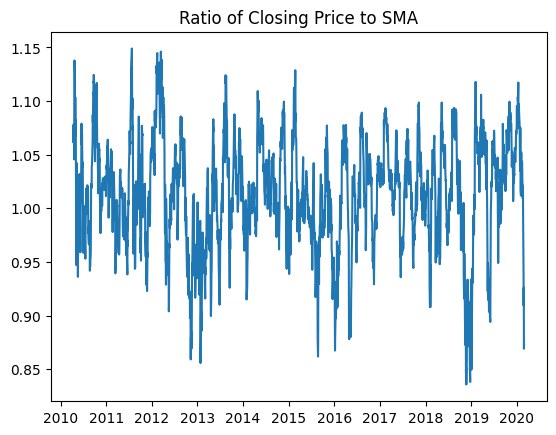

In [169]:
ratios = df['Ratio'].dropna()
plt.title("Ratio of Closing Price to SMA")
plt.plot(ratios)
plt.show()

In [170]:
percentiles = [25, 50, 75]
sma_percentiles = np.percentile(ratios, percentiles)
print(sma_percentiles)

[0.98420251 1.01592157 1.04776993]


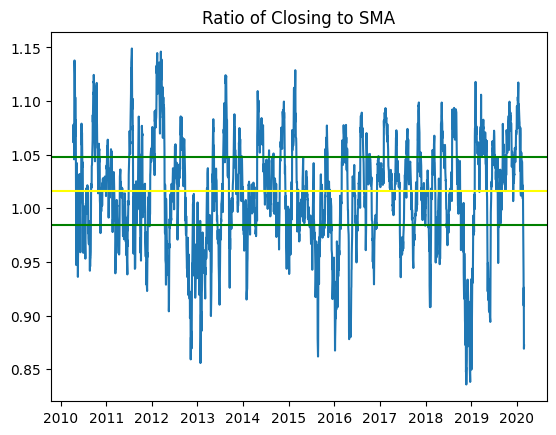

In [171]:
plt.title("Ratio of Closing to SMA")
plt.plot(ratios)
plt.axhline(sma_percentiles[0], c='green', label="25th percentile")
plt.axhline(sma_percentiles[1], c='yellow', label="50th percentile")
plt.axhline(sma_percentiles[2], c='green', label="75th percentile")
plt.show()

## Thoughts
We can see that we roughly settle around the mean which is supported by mean reversion and also the percentile plots of the data

## Buy and Sell Signals for the Strategy

We will now be working on figuring out when to buy and sell based upon this moving average column and the ratio column.

In essence, our strategy works like this. We buy when signals fall below the 25th percentile and sell when signals lie above the 75th percentile. Why is that? Well we know that by mean reversion we always gravitate towards the mean, thus when the closing price lies below the simple moving average then it will tend upwards and vice versa if it lies above

In [172]:
def calc_signals(buy_percentile = 15, sell_percentile = 80):
    sma_ratio_buy = np.percentile(ratios, [buy_percentile])[0]
    sma_ratio_sell = np.percentile(ratios, [sell_percentile])[0]
    print(sma_ratio_buy, sma_ratio_sell)
    def buy_sell_hold(r):
        if r <= sma_ratio_buy:
            return 1
        elif r >= sma_ratio_sell:
            return -1
        else:
            return 0
    df["Signal"] = df['Ratio'].apply(lambda x: buy_sell_hold(x))
calc_signals()

0.9634022034550568 1.0568130618478877


## Calculate our profit and loss

With the signals in hand, we can calculate our profit and loss by checking when we buy or sell based upon the closing price. To make this simple, we will assume that we can only keep one stock in inventory at a time which means we can only buy at most one stock and sell at most one stock.

In [173]:
def calc_pnl():
    position = 0 
    entry_price = 0 
    pnl = []  
    for index, row in df.iterrows():
        signal = row['Signal']
        price = row['Close/Last']
        if position == 0: 
            if signal == 1:
                position = 1
                entry_price = price
                pnl.append(0)
            else:
                pnl.append(0)
        elif position == 1: 
            if signal == -1:
                if price < entry_price:
                    print(price, entry_price)
                pnl.append(price - entry_price)
                position = 0
            else:
                pnl.append(0)
    df['pnl'] = np.cumsum(pnl)
calc_pnl()

65.8157 91.1671
119.27 122.57
103.01 113.18
165.25 214.45


Let's display our pnl and see how well our strategy performed.

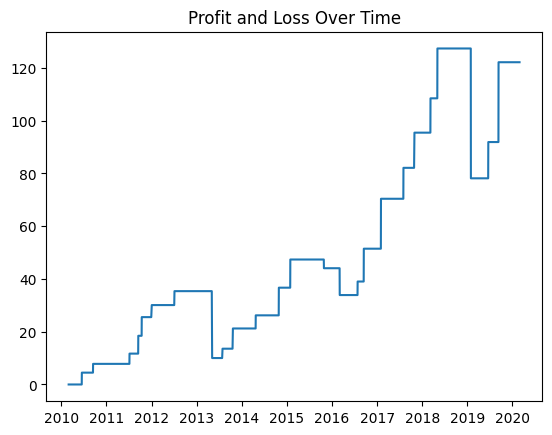

In [174]:
plt.plot(df['pnl'], label='PNL')
plt.title('Profit and Loss Over Time')
plt.show()

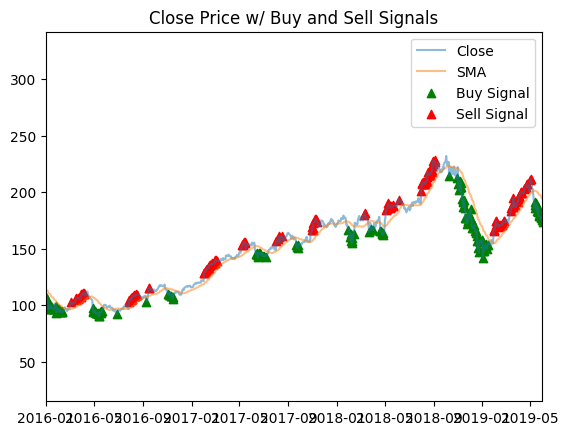

In [183]:
#For a better view on the decisions our algorithm makes
df['Buy'] = np.where(df.Signal == 1, df['Close/Last'], np.nan)
df['Sell'] = np.where(df.Signal == -1, df['Close/Last'], np.nan)
plt.title('Close Price w/ Buy and Sell Signals')
plt.plot(df['Close/Last'], alpha=0.5, label = 'Close')
plt.plot(df['SMA'], alpha = 0.5, label='SMA')
plt.scatter(df.index, df.Buy, alpha = 1, color = 'green', label = 'Buy Signal', marker = '^')
plt.scatter(df.index, df.Sell, alpha = 1, color = 'red', label = 'Sell Signal', marker = '^')
plt.xlim(pd.to_datetime("1/1/2016"), pd.to_datetime("6/1/2019"))
plt.legend()
plt.show()

## Testing Out Different Thresholds

We can note that we can change the weight of the percentiles for when we buy or sell to change the risk tolerance of the strategy.

Different firms accept different levels of risk. A prop trading firm is likely to play riskier with their money thus taking on larger profits and possibly larger losses. A hedge fund might be less likely to take it risky as they are trading with their investor's money.

Let's see how changing the thresholds affects overall pnl

1.0568130618478877 0.9736503334682943
87.1343 88.9671
65.8157 99.8143
119.27 128.54
103.01 120.57
102.95 108.54
165.25 223.1
199.46 208.48


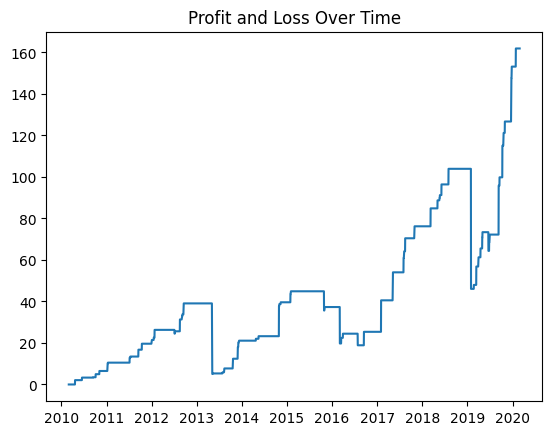

2020-02-28    161.8931
Name: pnl, dtype: float64


In [ ]:
buy_percentile = 80 #Change with your own value
sell_percentile = 20 #Change with your own value
calc_signals(buy_percentile, sell_percentile)
calc_pnl()
plt.plot(df['pnl'], label='PNL')
plt.title('Profit and Loss Over Time')
plt.show()
print(df['pnl'].tail(1))

## Let's try a different method for calculating signals

We will proceed by using a machine learning technique called LSTM or Long Short Term Memory.

## Overview of LSTM (Long Short-Term Memory)

LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) designed to better capture long-range dependencies in sequential data. It addresses the vanishing gradient problem that traditional RNNs face, allowing for the learning of long-term patterns in time-series or sequential data.

### Key Components of an LSTM:
An LSTM unit consists of three main gates:

1. **Forget Gate**: Decides which information from the cell state should be discarded or kept. It takes the previous hidden state $h(t-1)$ and the current input $x(t)$ and passes them through a sigmoid activation to produce values between 0 and 1.
   - Formula: $f(t) = \text{sigmoid}(W_f * [h(t-1), x(t)] + b_f)$
   
2. **Input Gate**: Controls which values should be updated in the cell state. It uses a sigmoid function to decide which values to update and a tanh function to create new candidate values.
   - Formula: $i(t) =  \text{sigmoid}(W_i * [h(t-1), x(t)] + b_i)$
   - Candidate values: $g(t) = tanh(W_g * [h(t-1), x(t)] + b_g)$

3. **Output Gate**: Determines the hidden state (output) of the current time step based on the current cell state and the input. It uses a sigmoid activation and multiplies it by the tanh of the cell state.
   - Formula: $o(t) =  \text{sigmoid}(W_o * [h(t-1), x(t)] + b_o)$
   - Output: $h(t) = o(t) * tanh(c(t))$

### LSTM Cell State:
- The cell state $c(t)$ acts as the memory of the LSTM, carrying relevant information across time steps. It is updated by adding the new candidate values scaled by the input gate and forgetting part of the previous cell state based on the forget gate.

### How LSTM Works:
1. **Forget Gate**: Decides what information to discard from the cell state. Discards long term memory
2. **Input Gate**: Updates the cell state with new information from the short term memoory
3. **Cell State Update**: Combines the old cell state with the new candidate values to form the new memory.
4. **Output Gate**: Outputs the final hidden state to the next time step.

This mechanism allows LSTM networks to effectively retain important information for long sequences while forgetting less useful information.

In [ ]:
df = pd.read_csv("data.csv")
df.rename(columns={" Close/Last":"Close", " Volume":"Volume", " Open":"Open", " High":"High", " Low":"Low"}, inplace=True)
bad_columns = ['Close', 'Open', 'High', 'Low']
for col in bad_columns:
    df[col] = df[col].apply(lambda x: float(x.strip(" ")[1:]))
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df = df.sort_index()
df.drop(labels=['Date'], axis=1, inplace=True)
print(df.head())

              Close     Volume     Open     High      Low
2010-03-01  29.8557  137312041  29.3928  29.9286  29.3500
2010-03-02  29.8357  141486282  29.9900  30.1186  29.6771
2010-03-03  29.9043   92846488  29.8486  29.9814  29.7057
2010-03-04  30.1014   89591907  29.8971  30.1314  29.8043
2010-03-05  31.2786  224647427  30.7057  31.3857  30.6614
